In [3]:
import pandas as pd
import re
import string
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import nltk.data
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls "/content/drive/MyDrive/Colab Notebooks"

 Amazon_Reviews_ETL.ipynb		    NLP_numbers.csv
'articles (3).csv'			    NLP_numbers_withnan.csv
 Challenge16.ipynb			    normalized_df.csv
 Copy_of_model_training.ipynb		    Pipleine.ipynb
'Copy of NLP_model_training (1).ipynb'	    pos_tag_ndf1.csv
'Copy of NLP_model_training.ipynb'	    Untitled
'Copy of NLP_model_training(Jul21).ipynb'   Untitled0.ipynb
'Copy of Pipleine.ipynb'		    Untitled10.ipynb
'Copy of Untitled2.ipynb'		    Untitled11.ipynb
 ETL.ipynb				    Untitled1.ipynb
'Example 1.ipynb'			    Untitled2.ipynb
 fakesmall.csv				    Untitled3.ipynb
 Nida_model_training.ipynb		    Untitled4.ipynb
 NLP.csv				    Untitled5.ipynb
 NLP_draft.ipynb			    Untitled6.ipynb
 NLP.ipynb				    Untitled7.ipynb
'NLP_model_training(jul21).ipynb'	    Untitled8.ipynb
'NLP_model_training_Old data.ipynb'	    Untitled9.ipynb
 NLP_normalized.csv			    Vine_Review_Analysis.ipynb


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/articles (3).csv',sep='\t') 
df

,articlesid,fakeid,trueid,title,text,subject,label
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1
...,...,...,...,...,...,...,...
38640,38641,NaN,21413.0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0
38641,38642,NaN,21414.0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",World News,0
38642,38643,NaN,21415.0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,World News,0
38643,38644,NaN,21416.0,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,World News,0


In [7]:
df["article"] = df["title"] +" "+ df['text']
df

,articlesid,fakeid,trueid,title,text,subject,label,article
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...,...,...,...,...
38640,38641,NaN,21413.0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0,'Fully committed' NATO backs new U.S. approach...
38641,38642,NaN,21414.0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",World News,0,LexisNexis withdrew two products from Chinese ...
38642,38643,NaN,21415.0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,World News,0,Minsk cultural hub becomes haven from authorit...
38643,38644,NaN,21416.0,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,World News,0,Vatican upbeat on possibility of Pope Francis ...


In [99]:
# df.loc[0,'article']

In [8]:
import re
@np.vectorize
def wordpre(title):
    title = title.lower()
    # title = re.sub(r"(\w+)'s", r'\1s', title) #removing ' between word and s and joing s with the word
    # title = re.sub(r"(\w+)'t", r'\1t', title) #removing ' between word and t and joing t with the word
    # title = re.sub(r'(\w+).(\w+)',r'\1', title) # removing . between words and joining words
    title = re.sub('(?<!\w)([A-Za-z])\.', r'\1', title) #Cathy's
    title = re.sub('“|’|"|”', '', title) # Cathy's
    title = re.sub('\[.*?\]', '', title)
    title = re.sub("\\W"," ",title) # remove special chars
    title = re.sub('https?://\S+|www\.\S+', '', title)
    title = re.sub('<.*?>+', '', title)
    title = re.sub('[%s]' % re.escape(string.punctuation), '', title)
    title = re.sub('\n', '', title)
    title = re.sub('\w*\d\w*', '', title)
    
    return title

#  CATHY's FEEDBACK

# import re
# @np.vectorize
# def wordpre(title):
#     title = title.lower()
#     # title = re.sub(r"(\w+)'s", r'\1s', title) #removing ' between word and s and joing s with the word
#     # title = re.sub(r"(\w+)'t", r'\1t', title) #removing ' between word and t and joing t with the word
#     # title = re.sub(r'(\w+).(\w+)',r'\1', title) # removing . between words and joining words
#     title = re.sub('\[.*?\]', '', title)
#     title = re.sub('(?<!\w)([A-Z])\.', r'\1', title)
#     title = re.sub('“|’|"|”', '', title) # Cathy's suggestions
#     title = re.sub("(?<=\w)['`''](?=\w)", '', title) # Riya's suggestion
#     #title = re.sub("\\W"," ",title) # remove special chars
#     title = re.sub('https?://\S+|www\.\S+', '', title)
#     title = re.sub('<.*?>+', '', title)
#     title = re.sub('[%s]' % re.escape(string.punctuation), '', title)
#     title = re.sub('\n', '', title)
#     title = re.sub('\w*\d\w*', '', title)
#     return title

In [9]:
##  Applying the wordpre method to the dataset
df['text_wordpre']= df['text'].apply(wordpre)
df['title_wordpre']= df['title'].apply(wordpre)
df['article_wordpre']= df['article'].apply(wordpre)
df

,articlesid,fakeid,trueid,title,text,subject,label,article,text_wordpre,title_wordpre,article_wordpre
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new years...,donald trump sends out embarrassing new years...
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian ...
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,sheriff david clarke becomes an internet joke...,sheriff david clarke becomes an internet joke...
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,trump is so obsessed he even has obamas name ...,trump is so obsessed he even has obamas name ...
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,pope francis just called out donald trump dur...,pope francis just called out donald trump dur...
...,...,...,...,...,...,...,...,...,...,...,...
38640,38641,NaN,21413.0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies on tuesday we...,fully committed nato backs new us approach o...,fully committed nato backs new us approach o...
38641,38642,NaN,21414.0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",World News,0,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis a provider of l...,lexisnexis withdrew two products from chinese ...,lexisnexis withdrew two products from chinese ...
38642,38643,NaN,21415.0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,World News,0,Minsk cultural hub becomes haven from authorit...,minsk reuters in the shadow of disused sov...,minsk cultural hub becomes haven from authorities,minsk cultural hub becomes haven from authorit...
38643,38644,NaN,21416.0,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,World News,0,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary of state ...,vatican upbeat on possibility of pope francis ...,vatican upbeat on possibility of pope francis ...


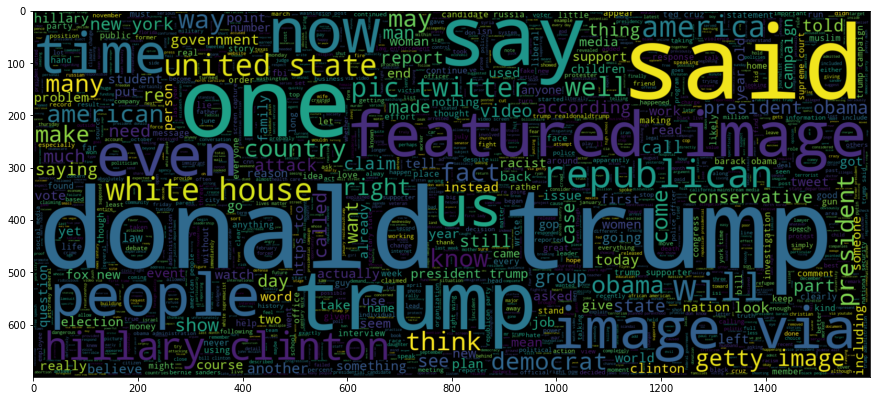

In [10]:
#word used in fake news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(df[df.label== 1].article_wordpre))
plt.imshow(wc, interpolation="bilinear")

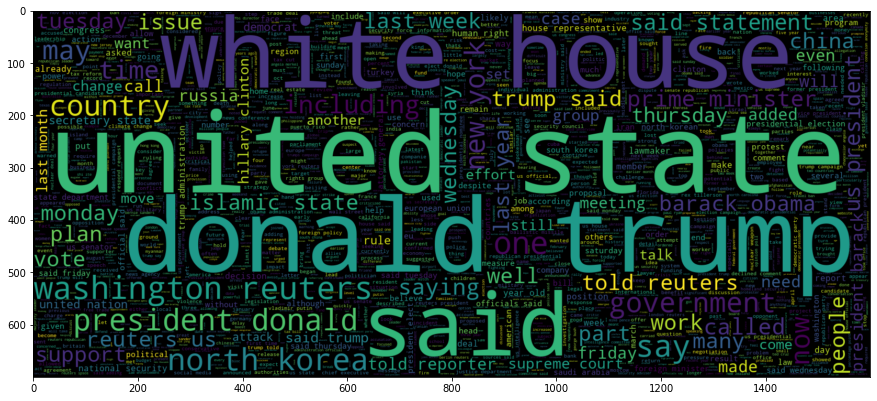

In [11]:
#word used in true news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(df[df.label== 0].article_wordpre))
plt.imshow(wc, interpolation="bilinear")

In [12]:
#Word count
title_wordcount = df['title_wordpre'].apply(len)
df['title_count']= title_wordcount

text_wordcount = df['text_wordpre'].apply(len)
df['text_count']= text_wordcount

article_wordcount = df['article_wordpre'].apply(len)-1
df['article_count']= article_wordcount

df

,articlesid,fakeid,trueid,title,text,subject,label,article,text_wordpre,title_wordpre,article_wordpre,title_count,text_count,article_count
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new years...,donald trump sends out embarrassing new years...,78,2700,2778
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian ...,69,1891,1960
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,sheriff david clarke becomes an internet joke...,sheriff david clarke becomes an internet joke...,89,3381,3470
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,trump is so obsessed he even has obamas name ...,trump is so obsessed he even has obamas name ...,77,2599,2676
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,pope francis just called out donald trump dur...,pope francis just called out donald trump dur...,70,2346,2416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,38641,NaN,21413.0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies on tuesday we...,fully committed nato backs new us approach o...,fully committed nato backs new us approach o...,59,2782,2841
38641,38642,NaN,21414.0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",World News,0,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis a provider of l...,lexisnexis withdrew two products from chinese ...,lexisnexis withdrew two products from chinese ...,52,796,848
38642,38643,NaN,21415.0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,World News,0,Minsk cultural hub becomes haven from authorit...,minsk reuters in the shadow of disused sov...,minsk cultural hub becomes haven from authorities,minsk cultural hub becomes haven from authorit...,49,1936,1985
38643,38644,NaN,21416.0,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,World News,0,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary of state ...,vatican upbeat on possibility of pope francis ...,vatican upbeat on possibility of pope francis ...,61,1193,1254


In [13]:
#Downloading nltk StopWords and Wordnet 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['title_stop'] = df['title_wordpre'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['text_stop'] = df['text_wordpre'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['article_stop'] = df['article_wordpre'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df


,articlesid,fakeid,trueid,title,text,subject,label,article,text_wordpre,title_wordpre,article_wordpre,title_count,text_count,article_count,title_stop,text_stop,article_stop
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new years...,donald trump sends out embarrassing new years...,78,2700,2778,donald trump sends embarrassing new years eve ...,donald trump wish americans happy new year lea...,donald trump sends embarrassing new years eve ...
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian ...,69,1891,1960,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,sheriff david clarke becomes an internet joke...,sheriff david clarke becomes an internet joke...,89,3381,3470,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,trump is so obsessed he even has obamas name ...,trump is so obsessed he even has obamas name ...,77,2599,2676,trump obsessed even obamas name coded website ...,christmas day donald trump announced would bac...,trump obsessed even obamas name coded website ...
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,pope francis just called out donald trump dur...,pope francis just called out donald trump dur...,70,2346,2416,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,pope francis called donald trump christmas spe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,38641,NaN,21413.0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies on tuesday we...,fully committed nato backs new us approach o...,fully committed nato backs new us approach o...,59,2782,2841,fully committed nato backs new us approach afg...,brussels reuters nato allies tuesday welcomed ...,fully committed nato backs new us approach afg...
38641,38642,NaN,21414.0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",World News,0,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis a provider of l...,lexisnexis withdrew two products from chinese ...,lexisnexis withdrew two products from chinese ...,52,796,848,lexisnexis withdrew two products chinese market,london reuters lexisnexis provider legal regul...,lexisnexis withdrew two products chinese marke...
38642,38643,NaN,21415.0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,World News,0,Minsk cultural hub becomes haven from authorit...,minsk reuters in the shadow of disused sov...,minsk cultural hub becomes haven from authorities,minsk cultural hub becomes haven from authorit...,49,1936,1985,minsk cultural hu

In [15]:
# Top 100 words in true articles
df_true = df.loc[df['label']==0]
dtt = df_true['article_stop']
from collections import Counter
p = Counter(" ".join(dtt).split()).most_common(100)
rsltt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rsltt)

df_t_100 = rsltt
df_t_100

         Word  Frequency
0        said      97828
1       trump      48018
2          us      47148
3       would      31453
4     reuters      28785
..        ...        ...
95         eu       5572
96       next       5519
97      south       5515
98  democrats       5482
99    general       5471

[100 rows x 2 columns]


,Word,Frequency
0,said,97828
1,trump,48018
2,us,47148
3,would,31453
4,reuters,28785
...,...,...
95,eu,5572
96,next,5519
97,south,5515
98,democrats,5482


In [48]:
df_t_100.to_csv("/content/drive/MyDrive/Colab Notebooks/true_100.csv")

In [16]:
# Top 100 words in fake articles
df_fake = df.loc[df['label']==1]

dt = df_fake['article_stop']

from collections import Counter
p = Counter(" ".join(dt).split()).most_common(100)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

df_f_100 = rslt
df_f_100

         Word  Frequency
0       trump      74297
1        said      24953
2   president      21548
3      people      21535
4         one      19323
..        ...        ...
95       good       4482
96     images       4462
97     office       4417
98     saying       4228
99   actually       4219

[100 rows x 2 columns]


,Word,Frequency
0,trump,74297
1,said,24953
2,president,21548
3,people,21535
4,one,19323
...,...,...
95,good,4482
96,images,4462
97,office,4417
98,saying,4228


In [49]:
df_f_100.to_csv("/content/drive/MyDrive/Colab Notebooks/fake_100.csv")

In [17]:
# Tokenizing words in title
from nltk import word_tokenize
nltk.download('punkt')
df['title_tokenized'] = df['title_stop'].apply(word_tokenize)
df['text_tokenized'] = df['text_stop'].apply(word_tokenize)
df['article_tokenized'] = df['article_stop'].apply(word_tokenize)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,articlesid,fakeid,trueid,title,text,subject,label,article,text_wordpre,title_wordpre,article_wordpre,title_count,text_count,article_count,title_stop,text_stop,article_stop,title_tokenized,text_tokenized,article_tokenized
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new years...,donald trump sends out embarrassing new years...,78,2700,2778,donald trump sends embarrassing new years eve ...,donald trump wish americans happy new year lea...,donald trump sends embarrassing new years eve ...,"[donald, trump, sends, embarrassing, new, year...","[donald, trump, wish, americans, happy, new, y...","[donald, trump, sends, embarrassing, new, year..."
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian ...,69,1891,1960,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...,"[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev...","[drunk, bragging, trump, staffer, started, rus..."
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,sheriff david clarke becomes an internet joke...,sheriff david clarke becomes an internet joke...,89,3381,3470,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...,"[sheriff, david, clarke, becomes, internet, jo...","[friday, revealed, former, milwaukee, sheriff,...","[sheriff, david, clarke, becomes, internet, jo..."
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,trump is so obsessed he even has obamas name ...,trump is so obsessed he even has obamas name ...,77,2599,2676,trump obsessed even obamas name coded website ...,christmas day donald trump announced would bac...,trump obsessed even obamas name coded website ...,"[trump, obsessed, even, obamas, name, coded, w...","[christmas, day, donald, trump, announced, wou...","[trump, obsessed, even, obamas, name, coded, w..."
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,pope francis just called out donald trump dur...,pope francis just called out donald trump dur...,70,2346,2416,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,pope francis called donald trump christmas spe...,"[pope, francis, called, donald, trump, christm...","[pope, francis, used, annual, christmas, day, ...","[pope, francis, called, donald, trump, christm..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,38641,NaN,21413.0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies on tuesday we...,fully committed nato backs new us approach o...,fully committed nato backs new us approach o...,59,2782,2841,fully committed nato backs new us approach afg...,brussels reuters nato allies tuesday welcomed ...,fully committed nato backs new us approach afg...,"[fully, commit

In [18]:
# length of text and title after tokenizing

#length of title
title_tok_wordcount = df['title_tokenized'].apply(len)
df['title_tokenized_count']= title_tok_wordcount

# length of text
text_tok_wordcount = df['text_tokenized'].apply(len)
df['text_tokenized_count']= text_tok_wordcount

# length of article
article_tok_wordcount = df['article_tokenized'].apply(len)
df['article_tokenized_count']= article_tok_wordcount

df

,articlesid,fakeid,trueid,title,text,subject,label,article,text_wordpre,title_wordpre,article_wordpre,title_count,text_count,article_count,title_stop,text_stop,article_stop,title_tokenized,text_tokenized,article_tokenized,title_tokenized_count,text_tokenized_count,article_tokenized_count
0,1,1.0,NaN,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,US News,1,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,donald trump sends out embarrassing new years...,donald trump sends out embarrassing new years...,78,2700,2778,donald trump sends embarrassing new years eve ...,donald trump wish americans happy new year lea...,donald trump sends embarrassing new years eve ...,"[donald, trump, sends, embarrassing, new, year...","[donald, trump, wish, americans, happy, new, y...","[donald, trump, sends, embarrassing, new, year...",9,258,267
1,2,2.0,NaN,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,US News,1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian ...,drunk bragging trump staffer started russian ...,69,1891,1960,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...,"[drunk, bragging, trump, staffer, started, rus...","[house, intelligence, committee, chairman, dev...","[drunk, bragging, trump, staffer, started, rus...",8,183,191
2,3,3.0,NaN,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",US News,1,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauk...,sheriff david clarke becomes an internet joke...,sheriff david clarke becomes an internet joke...,89,3381,3470,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...,"[sheriff, david, clarke, becomes, internet, jo...","[friday, revealed, former, milwaukee, sheriff,...","[sheriff, david, clarke, becomes, internet, jo...",10,325,335
3,4,4.0,NaN,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",US News,1,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that ...,trump is so obsessed he even has obamas name ...,trump is so obsessed he even has obamas name ...,77,2599,2676,trump obsessed even obamas name coded website ...,christmas day donald trump announced would bac...,trump obsessed even obamas name coded website ...,"[trump, obsessed, even, obamas, name, coded, w...","[christmas, day, donald, trump, announced, wou...","[trump, obsessed, even, obamas, name, coded, w...",8,261,269
4,5,5.0,NaN,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,US News,1,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,pope francis just called out donald trump dur...,pope francis just called out donald trump dur...,70,2346,2416,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,pope francis called donald trump christmas spe...,"[pope, francis, called, donald, trump, christm...","[pope, francis, used, annual, christmas, day, ...","[pope, francis, called, donald, trump, christm...",7,212,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,38641,NaN,21413.0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,World News,0,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies on tuesday we...,fully committed nato backs new us approach o...,fully committed nato backs new us approach o...,59,2782,2841,fully committed nato backs new us a

In [19]:
# df2 = df[['article_wordpre','article_stop']]
# df2

In [20]:
# df_split = np.array_split(df2, 3)
# df_split[0]['article_wordpre']

In [21]:
# nltk.download('averaged_perceptron_tagger')
# ndf_sp1 = pd.DataFrame()
# text = df_split[0]['article_wordpre'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize) # QUESTION FOR CATHY : SHOULD WE USE THIS ON article_stop columm?
# from collections import Counter
# for i in text: 
#     N = nltk.pos_tag(i)
#     C = Counter([j for i,j in N])
#     S = pd.Series([C])
#     N = pd.DataFrame.from_records(S, columns = S.sum().keys())
#     ndf_sp1 = pd.concat([ndf_sp1, N], ignore_index=True, sort=False)
# ndf_sp1

In [22]:
# ndf_sp2 = pd.DataFrame()
# text_2 = df_split[1]['article_wordpre'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize) # QUESTION FOR CATHY : SHOULD WE USE THIS ON article_stop columm?
# from collections import Counter
# for i in text_2: 
#     N = nltk.pos_tag(i)
#     C = Counter([j for i,j in N])
#     S = pd.Series([C])
#     N = pd.DataFrame.from_records(S, columns = S.sum().keys())
#     ndf_sp2 = pd.concat([ndf_sp2, N], ignore_index=True, sort=False)
# ndf_sp2

In [23]:
# ndf_sp3 = pd.DataFrame()
# text_3 = df_split[2]['article_wordpre'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize) # QUESTION FOR CATHY : SHOULD WE USE THIS ON article_stop columm?
# from collections import Counter
# for i in text_3: 
#     N = nltk.pos_tag(i)
#     C = Counter([j for i,j in N])
#     S = pd.Series([C])
#     N = pd.DataFrame.from_records(S, columns = S.sum().keys())
#     ndf_sp3 = pd.concat([ndf_sp3, N], ignore_index=True, sort=False)
# ndf_sp3

In [ ]:
# ndf_a = pd.DataFrame()
# ndf = pd.concat([ndf_sp1, ndf_sp2, ndf_sp3, ignore_index=True)
# ndf

In [24]:
# POS_Tag features

nltk.download('averaged_perceptron_tagger')
ndf = pd.DataFrame()
text = df['article_wordpre'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize) # QUESTION FOR CATHY : SHOULD WE USE THIS ON article_stop columm?
from collections import Counter
for i in text: 
    N = nltk.pos_tag(i)
    C = Counter([j for i,j in N])
    S = pd.Series([C])
    N = pd.DataFrame.from_records(S, columns = S.sum().keys())
    ndf = pd.concat([ndf, N], ignore_index=True, sort=False)
ndf

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,JJ,NN,VBZ,RP,VBG,NNS,VBP,DT,RB,VB,CC,PRP,IN,VBD,TO,PRP$,JJS,CD,JJR,RBR,VBN,MD,WP,FW,NNP,WRB,WDT,PDT,EX,RBS,NNPS,UH,WP$,'',POS,$,SYM
0,58.0,101.0,16.0,2.0,8.0,32.0,20.0,39.0,36.0,28.0,15.0,22.0,33.0,11.0,14.0,9.0,3.0,2.0,2.0,2.0,6.0,5.0,5.0,1.0,2.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35.0,98.0,9.0,1.0,11.0,17.0,1.0,30.0,11.0,4.0,8.0,9.0,38.0,18.0,9.0,2.0,NaN,3.0,1.0,NaN,9.0,1.0,2.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,58.0,157.0,13.0,3.0,8.0,34.0,25.0,38.0,18.0,32.0,9.0,35.0,64.0,19.0,18.0,15.0,NaN,1.0,2.0,1.0,18.0,5.0,3.0,1.0,2.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29.0,147.0,24.0,5.0,6.0,16.0,9.0,44.0,26.0,21.0,10.0,13.0,45.0,11.0,10.0,5.0,1.0,NaN,1.0,NaN,15.0,6.0,3.0,NaN,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29.0,80.0,8.0,3.0,4.0,31.0,12.0,43.0,17.0,27.0,16.0,13.0,65.0,19.0,20.0,15.0,NaN,2.0,NaN,NaN,13.0,4.0,6.0,NaN,NaN,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,40.0,93.0,9.0,4.0,11.0,33.0,7.0,36.0,21.0,24.0,17.0,20.0,54.0,27.0,19.0,14.0,NaN,NaN,3.0,3.0,17.0,6.0,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38641,14.0,38.0,1.0,NaN,1.0,7.0,1.0,15.0,1.0,3.0,2.0,4.0,17.0,11.0,4.0,2.0,NaN,3.0,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38642,32.0,78.0,19.0,3.0,2.0,23.0,7.0,38.0,13.0,8.0,12.0,11.0,41.0,12.0,6.0,2.0,NaN,1.0,NaN,1.0,11.0,1.0,3.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38643,27.0,53.0,2.0,NaN,5.0,9.0,1.0,19.0,9.0,9.0,5.0,6.0,30.0,16.0,6.0,2.0,NaN,1.0,1.0,NaN,3.0,1.0,2.0,NaN,NaN,1.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# nltk.download('averaged_perceptron_tagger')
# ndf_stop = pd.DataFrame()
# text = df['article_stop'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize) # QUESTION FOR CATHY : SHOULD WE USE THIS ON article_stop columm?
# from collections import Counter
# for i in text: 
#     N = nltk.pos_tag(i)
#     C = Counter([j for i,j in N])
#     S = pd.Series([C])
#     N = pd.DataFrame.from_records(S, columns = S.sum().keys())
#     ndf_stop = pd.concat([ndf_stop, N], ignore_index=True, sort=False)
# ndf_stop

In [26]:
ndf

,JJ,NN,VBZ,RP,VBG,NNS,VBP,DT,RB,VB,CC,PRP,IN,VBD,TO,PRP$,JJS,CD,JJR,RBR,VBN,MD,WP,FW,NNP,WRB,WDT,PDT,EX,RBS,NNPS,UH,WP$,'',POS,$,SYM
0,58.0,101.0,16.0,2.0,8.0,32.0,20.0,39.0,36.0,28.0,15.0,22.0,33.0,11.0,14.0,9.0,3.0,2.0,2.0,2.0,6.0,5.0,5.0,1.0,2.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35.0,98.0,9.0,1.0,11.0,17.0,1.0,30.0,11.0,4.0,8.0,9.0,38.0,18.0,9.0,2.0,NaN,3.0,1.0,NaN,9.0,1.0,2.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,58.0,157.0,13.0,3.0,8.0,34.0,25.0,38.0,18.0,32.0,9.0,35.0,64.0,19.0,18.0,15.0,NaN,1.0,2.0,1.0,18.0,5.0,3.0,1.0,2.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29.0,147.0,24.0,5.0,6.0,16.0,9.0,44.0,26.0,21.0,10.0,13.0,45.0,11.0,10.0,5.0,1.0,NaN,1.0,NaN,15.0,6.0,3.0,NaN,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29.0,80.0,8.0,3.0,4.0,31.0,12.0,43.0,17.0,27.0,16.0,13.0,65.0,19.0,20.0,15.0,NaN,2.0,NaN,NaN,13.0,4.0,6.0,NaN,NaN,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,40.0,93.0,9.0,4.0,11.0,33.0,7.0,36.0,21.0,24.0,17.0,20.0,54.0,27.0,19.0,14.0,NaN,NaN,3.0,3.0,17.0,6.0,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38641,14.0,38.0,1.0,NaN,1.0,7.0,1.0,15.0,1.0,3.0,2.0,4.0,17.0,11.0,4.0,2.0,NaN,3.0,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38642,32.0,78.0,19.0,3.0,2.0,23.0,7.0,38.0,13.0,8.0,12.0,11.0,41.0,12.0,6.0,2.0,NaN,1.0,NaN,1.0,11.0,1.0,3.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38643,27.0,53.0,2.0,NaN,5.0,9.0,1.0,19.0,9.0,9.0,5.0,6.0,30.0,16.0,6.0,2.0,NaN,1.0,1.0,NaN,3.0,1.0,2.0,NaN,NaN,1.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# replacing NAN with 0
ndf1 = ndf.fillna(0)
ndf1

,JJ,NN,VBZ,RP,VBG,NNS,VBP,DT,RB,VB,CC,PRP,IN,VBD,TO,PRP$,JJS,CD,JJR,RBR,VBN,MD,WP,FW,NNP,WRB,WDT,PDT,EX,RBS,NNPS,UH,WP$,'',POS,$,SYM
0,58.0,101.0,16.0,2.0,8.0,32.0,20.0,39.0,36.0,28.0,15.0,22.0,33.0,11.0,14.0,9.0,3.0,2.0,2.0,2.0,6.0,5.0,5.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35.0,98.0,9.0,1.0,11.0,17.0,1.0,30.0,11.0,4.0,8.0,9.0,38.0,18.0,9.0,2.0,0.0,3.0,1.0,0.0,9.0,1.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58.0,157.0,13.0,3.0,8.0,34.0,25.0,38.0,18.0,32.0,9.0,35.0,64.0,19.0,18.0,15.0,0.0,1.0,2.0,1.0,18.0,5.0,3.0,1.0,2.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29.0,147.0,24.0,5.0,6.0,16.0,9.0,44.0,26.0,21.0,10.0,13.0,45.0,11.0,10.0,5.0,1.0,0.0,1.0,0.0,15.0,6.0,3.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.0,80.0,8.0,3.0,4.0,31.0,12.0,43.0,17.0,27.0,16.0,13.0,65.0,19.0,20.0,15.0,0.0,2.0,0.0,0.0,13.0,4.0,6.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,40.0,93.0,9.0,4.0,11.0,33.0,7.0,36.0,21.0,24.0,17.0,20.0,54.0,27.0,19.0,14.0,0.0,0.0,3.0,3.0,17.0,6.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38641,14.0,38.0,1.0,0.0,1.0,7.0,1.0,15.0,1.0,3.0,2.0,4.0,17.0,11.0,4.0,2.0,0.0,3.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38642,32.0,78.0,19.0,3.0,2.0,23.0,7.0,38.0,13.0,8.0,12.0,11.0,41.0,12.0,6.0,2.0,0.0,1.0,0.0,1.0,11.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38643,27.0,53.0,2.0,0.0,5.0,9.0,1.0,19.0,9.0,9.0,5.0,6.0,30.0,16.0,6.0,2.0,0.0,1.0,1.0,0.0,3.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# new dataframe with sum column
ndf1["sum"] = ndf1.sum(axis=1)
ndf1

,JJ,NN,VBZ,RP,VBG,NNS,VBP,DT,RB,VB,CC,PRP,IN,VBD,TO,PRP$,JJS,CD,JJR,RBR,VBN,MD,WP,FW,NNP,WRB,WDT,PDT,EX,RBS,NNPS,UH,WP$,'',POS,$,SYM,sum
0,58.0,101.0,16.0,2.0,8.0,32.0,20.0,39.0,36.0,28.0,15.0,22.0,33.0,11.0,14.0,9.0,3.0,2.0,2.0,2.0,6.0,5.0,5.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,477.0
1,35.0,98.0,9.0,1.0,11.0,17.0,1.0,30.0,11.0,4.0,8.0,9.0,38.0,18.0,9.0,2.0,0.0,3.0,1.0,0.0,9.0,1.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,321.0
2,58.0,157.0,13.0,3.0,8.0,34.0,25.0,38.0,18.0,32.0,9.0,35.0,64.0,19.0,18.0,15.0,0.0,1.0,2.0,1.0,18.0,5.0,3.0,1.0,2.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,586.0
3,29.0,147.0,24.0,5.0,6.0,16.0,9.0,44.0,26.0,21.0,10.0,13.0,45.0,11.0,10.0,5.0,1.0,0.0,1.0,0.0,15.0,6.0,3.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,455.0
4,29.0,80.0,8.0,3.0,4.0,31.0,12.0,43.0,17.0,27.0,16.0,13.0,65.0,19.0,20.0,15.0,0.0,2.0,0.0,0.0,13.0,4.0,6.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,433.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,40.0,93.0,9.0,4.0,11.0,33.0,7.0,36.0,21.0,24.0,17.0,20.0,54.0,27.0,19.0,14.0,0.0,0.0,3.0,3.0,17.0,6.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,464.0
38641,14.0,38.0,1.0,0.0,1.0,7.0,1.0,15.0,1.0,3.0,2.0,4.0,17.0,11.0,4.0,2.0,0.0,3.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0
38642,32.0,78.0,19.0,3.0,2.0,23.0,7.0,38.0,13.0,8.0,12.0,11.0,41.0,12.0,6.0,2.0,0.0,1.0,0.0,1.0,11.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,328.0
38643,27.0,53.0,2.0,0.0,5.0,9.0,1.0,19.0,9.0,9.0,5.0,6.0,30.0,16.0,6.0,2.0,0.0,1.0,1.0,0.0,3.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,211.0


In [29]:
# normalized dataframe every column divided by sum column
normalized_df = ndf1[['JJ',	'NN',	'VBZ', 'RP', 'VBG', 'VBP' , 'DT',	'RB',	'VB',	'CC',	'PRP','IN',	'VBD','TO',	'PRP$',	'NNS',	'JJS', 'CD','JJR','RBR', 'VBN',	'MD', 'WP',	'FW',	'NNP',	'WRB',	'WDT','PDT',	'EX',	'RBS',	'NNPS',	'UH',	'WP$','POS']].div(ndf1['sum'], axis=0) *100
normalized_df

,JJ,NN,VBZ,RP,VBG,VBP,DT,RB,VB,CC,PRP,IN,VBD,TO,PRP$,NNS,JJS,CD,JJR,RBR,VBN,MD,WP,FW,NNP,WRB,WDT,PDT,EX,RBS,NNPS,UH,WP$,POS
0,12.159329,21.174004,3.354298,0.419287,1.677149,4.192872,8.176101,7.547170,5.870021,3.144654,4.612159,6.918239,2.306080,2.935010,1.886792,6.708595,0.628931,0.419287,0.419287,0.419287,1.257862,1.048218,1.048218,0.209644,0.419287,0.628931,0.209644,0.209644,0.000000,0.000000,0.0,0.0,0.0,0.0
1,10.903427,30.529595,2.803738,0.311526,3.426791,0.311526,9.345794,3.426791,1.246106,2.492212,2.803738,11.838006,5.607477,2.803738,0.623053,5.295950,0.000000,0.934579,0.311526,0.000000,2.803738,0.311526,0.623053,0.000000,0.311526,0.934579,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,9.897611,26.791809,2.218430,0.511945,1.365188,4.266212,6.484642,3.071672,5.460751,1.535836,5.972696,10.921502,3.242321,3.071672,2.559727,5.802048,0.000000,0.170648,0.341297,0.170648,3.071672,0.853242,0.511945,0.170648,0.341297,0.511945,0.511945,0.000000,0.170648,0.000000,0.0,0.0,0.0,0.0
3,6.373626,32.307692,5.274725,1.098901,1.318681,1.978022,9.670330,5.714286,4.615385,2.197802,2.857143,9.890110,2.417582,2.197802,1.098901,3.516484,0.219780,0.000000,0.219780,0.000000,3.296703,1.318681,0.659341,0.000000,0.439560,0.439560,0.879121,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,6.697460,18.475751,1.847575,0.692841,0.923788,2.771363,9.930716,3.926097,6.235566,3.695150,3.002309,15.011547,4.387991,4.618938,3.464203,7.159353,0.000000,0.461894,0.000000,0.000000,3.002309,0.923788,1.385681,0.000000,0.000000,0.230947,0.461894,0.230947,0.461894,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,8.620690,20.043103,1.939655,0.862069,2.370690,1.508621,7.758621,4.525862,5.172414,3.663793,4.310345,11.637931,5.818966,4.094828,3.017241,7.112069,0.000000,0.000000,0.646552,0.646552,3.663793,1.293103,0.431034,0.000000,0.000000,0.000000,0.862069,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
38641,10.769231,29.230769,0.769231,0.000000,0.769231,0.769231,11.538462,0.769231,2.307692,1.538462,3.076923,13.076923,8.461538,3.076923,1.538462,5.384615,0.000000,2.307692,0.000000,0.769231,3.846154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
38642,9.756098,23.780488,5.792683,0.914634,0.609756,2.134146,11.585366,3.963415,2.439024,3.658537,3.353659,12.500000,3.658537,1.829268,0.609756,7.012195,0.000000,0.304878,0.000000,0.304878,3.353659,0.304878,0.914634,0.000000,0.304878,0.304878,0.000000,0.000000,0.304878,0.304878,0.0,0.0,0.0,0.0
38643,12.796209,25.118483,0.947867,0.000000,2.369668,0.473934,9.004739,4.265403,4.265403,2.369668,2.843602,14.218009,7.582938,2.843602,0.947867,4.265403,0.000000,0.473934,0.473934,0.000000,1.421801,0.473934,0.947867,0.000000,0.000000,0.473934,0.000000,0.473934,0.947867,0.000000,0.0,0.0,0.0,0.0


In [30]:
ndf1.to_csv("/content/drive/MyDrive/Colab Notebooks/pos_tag_ndf1(J21).csv")

In [31]:
normalized_df.to_csv("/content/drive/MyDrive/Colab Notebooks/normalized_df(J21).csv")

In [32]:
# sort unique values
# ndf.nunique().sort_values()

In [33]:
# ndf.sum().sort_values()

In [34]:
# ndf1.dtypes

In [35]:
# ndf.replace(np.nan, 0)

In [36]:
# ndf2 = ndf[['NN','JJ','NNS','VBD','RB','VBP','VBG','VBN','VB','IN','VBZ']]
# ndf2['nouns'] = ndf2['NN'] + ndf2['NNS']
# ndf2['verbs'] = ndf2['VBD'] + ndf2['VBG'] + ndf2['VBP'] + ndf2['VBN'] + ndf2['VB'] + ndf2['VBZ']
# ndf2 = ndf2.rename(columns = {'JJ': 'adjectives', 'IN': 'prepositions', 'RB': 'adverbs'})
# ndf2

In [37]:
# ndf3 = ndf2[['adjectives','adverbs','prepositions','nouns','verbs']]
# ndf3

In [38]:
df_dummies = pd.get_dummies(df['subject'])
df_dummies.head(5)

,US News,World News
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [39]:
df_final = pd.concat([df, df_dummies,normalized_df], axis=1)
df_final.tail(10)

,articlesid,fakeid,trueid,title,text,subject,label,article,text_wordpre,title_wordpre,article_wordpre,title_count,text_count,article_count,title_stop,text_stop,article_stop,title_tokenized,text_tokenized,article_tokenized,title_tokenized_count,text_tokenized_count,article_tokenized_count,US News,World News,JJ,NN,VBZ,RP,VBG,VBP,DT,RB,VB,CC,PRP,IN,VBD,TO,PRP$,NNS,JJS,CD,JJR,RBR,VBN,MD,WP,FW,NNP,WRB,WDT,PDT,EX,RBS,NNPS,UH,WP$,POS
38635,38636,NaN,21406.0,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,World News,0,Trump talks tough on Pakistan's 'terrorist' ha...,islamabad reuters outlining a new strategy...,trump talks tough on pakistan s terrorist ha...,trump talks tough on pakistan s terrorist ha...,70,4341,4411,trump talks tough pakistan terrorist havens op...,islamabad reuters outlining new strategy war a...,trump talks tough pakistan terrorist havens op...,"[trump, talks, tough, pakistan, terrorist, hav...","[islamabad, reuters, outlining, new, strategy,...","[trump, talks, tough, pakistan, terrorist, hav...",8,418,426,0,1,12.445731,21.852388,1.881331,0.144718,2.315485,2.170767,7.235890,3.907381,5.933430,3.617945,3.617945,12.879884,4.775687,3.617945,0.578871,7.091172,0.000000,0.289436,0.289436,0.289436,2.315485,1.736614,0.289436,0.000000,0.144718,0.289436,0.144718,0.000000,0.144718,0.000000,0.0,0.0,0.0,0.0
38636,38637,NaN,21408.0,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",World News,0,"Mata Pires, owner of embattled Brazil builder ...",sao paulo reuters cesar mata pires the ow...,mata pires owner of embattled brazil builder ...,mata pires owner of embattled brazil builder ...,55,1945,2000,mata pires owner embattled brazil builder oas ...,sao paulo reuters cesar mata pires owner co fo...,mata pires owner embattled brazil builder oas ...,"[mata, pires, owner, embattled, brazil, builde...","[sao, paulo, reuters, cesar, mata, pires, owne...","[mata, pires, owner, embattled, brazil, builde...",8,200,208,0,1,8.895706,26.073620,2.147239,0.613497,1.840491,1.533742,8.895706,1.533742,1.840491,1.840491,1.533742,13.496933,8.895706,1.840491,2.147239,8.895706,0.613497,1.533742,0.306748,0.306748,3.374233,0.000000,0.306748,0.000000,0.306748,0.613497,0.613497,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
38637,38638,NaN,21409.0,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,World News,0,"U.S., North Korea clash at U.N. forum over nuc...",geneva reuters north korea and the united ...,us north korea clash at un forum over nuclear...,us north korea clash at un forum over nuclear...,54,4274,4328,us north korea clash un forum nuclear weapons,geneva reuters north korea united states clash...,us north korea clash un forum nuclear weapons ...,"[us, north, korea, clash, un, forum, nuclear, ...","[geneva, reuters, north, korea, united, states...","[us, north, korea, clash, un, forum, nuclear, ...",8,428,436,0,1,15.138889,21.111111,0.694444,0.277778,2.222222,2.222222,10.416667,2.916667,3.888889,2.916667,4.027778,11.666667,4.444444,3.750000,1.527778,7.500000,0.000000,0.555556,0.000000,0.000000,1.944444,1.388889,0.138889,0.277778,0.000000,0.138889,0.555556,0.000000,0.138889,0.138889,0.0,0.0,0.0,0.0
38638,38639,NaN,21411.0,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,World News,0,Headless torso could belong to submarine journ...,copenhagen reuters danish police said on t...,headless torso could belong to submarine journ...,headless torso could belong to submarine journ...,66,1732,1798,headless torso could belong submarine journali...,copenhagen reuters danish police said tuesday ...,headless torso could belong submarine journali...,"[headless, torso, could, belong, submarine, jo...","[copenhagen, reuters, danish, police, said, tu...","[headless, torso, could, belong, submarine, jo...",8,163,171,0,1,6.885246,28.196721,2.295082,0.983607,3.27

In [40]:
df_final.to_csv("/content/drive/MyDrive/Colab Notebooks/NLP_df_final(J21).csv")

In [41]:
df_final_numbers = df_final.drop(['text','title','article','text_wordpre', 'title_wordpre', 'article_wordpre', 'text_stop', 'title_stop', 'article_stop', 'title_tokenized', 'text_tokenized', 'article_tokenized'], axis = 1)
df_final_numbers

,articlesid,fakeid,trueid,subject,label,title_count,text_count,article_count,title_tokenized_count,text_tokenized_count,article_tokenized_count,US News,World News,JJ,NN,VBZ,RP,VBG,VBP,DT,RB,VB,CC,PRP,IN,VBD,TO,PRP$,NNS,JJS,CD,JJR,RBR,VBN,MD,WP,FW,NNP,WRB,WDT,PDT,EX,RBS,NNPS,UH,WP$,POS
0,1,1.0,NaN,US News,1,78,2700,2778,9,258,267,1,0,12.159329,21.174004,3.354298,0.419287,1.677149,4.192872,8.176101,7.547170,5.870021,3.144654,4.612159,6.918239,2.306080,2.935010,1.886792,6.708595,0.628931,0.419287,0.419287,0.419287,1.257862,1.048218,1.048218,0.209644,0.419287,0.628931,0.209644,0.209644,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2,2.0,NaN,US News,1,69,1891,1960,8,183,191,1,0,10.903427,30.529595,2.803738,0.311526,3.426791,0.311526,9.345794,3.426791,1.246106,2.492212,2.803738,11.838006,5.607477,2.803738,0.623053,5.295950,0.000000,0.934579,0.311526,0.000000,2.803738,0.311526,0.623053,0.000000,0.311526,0.934579,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,3,3.0,NaN,US News,1,89,3381,3470,10,325,335,1,0,9.897611,26.791809,2.218430,0.511945,1.365188,4.266212,6.484642,3.071672,5.460751,1.535836,5.972696,10.921502,3.242321,3.071672,2.559727,5.802048,0.000000,0.170648,0.341297,0.170648,3.071672,0.853242,0.511945,0.170648,0.341297,0.511945,0.511945,0.000000,0.170648,0.000000,0.0,0.0,0.0,0.0
3,4,4.0,NaN,US News,1,77,2599,2676,8,261,269,1,0,6.373626,32.307692,5.274725,1.098901,1.318681,1.978022,9.670330,5.714286,4.615385,2.197802,2.857143,9.890110,2.417582,2.197802,1.098901,3.516484,0.219780,0.000000,0.219780,0.000000,3.296703,1.318681,0.659341,0.000000,0.439560,0.439560,0.879121,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,5,5.0,NaN,US News,1,70,2346,2416,7,212,219,1,0,6.697460,18.475751,1.847575,0.692841,0.923788,2.771363,9.930716,3.926097,6.235566,3.695150,3.002309,15.011547,4.387991,4.618938,3.464203,7.159353,0.000000,0.461894,0.000000,0.000000,3.002309,0.923788,1.385681,0.000000,0.000000,0.230947,0.461894,0.230947,0.461894,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38640,38641,NaN,21413.0,World News,0,59,2782,2841,8,262,270,0,1,8.620690,20.043103,1.939655,0.862069,2.370690,1.508621,7.758621,4.525862,5.172414,3.663793,4.310345,11.637931,5.818966,4.094828,3.017241,7.112069,0.000000,0.000000,0.646552,0.646552,3.663793,1.293103,0.431034,0.000000,0.000000,0.000000,0.862069,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
38641,38642,NaN,21414.0,World News,0,52,796,848,6,75,81,0,1,10.769231,29.230769,0.769231,0.000000,0.769231,0.769231,11.538462,0.769231,2.307692,1.538462,3.076923,13.076923,8.461538,3.076923,1.538462,5.384615,0.000000,2.307692,0.000000,0.769231,3.846154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
38642,38643,NaN,21415.0,World News,0,49,1936,1985,5,174,179,0,1,9.756098,23.780488,5.792683,0.914634,0.609756,2.134146,11.585366,3.963415,2.439024,3.658537,3.353659,12.500000,3.658537,1.829268,0.609756,7.012195,0.000000,0.304878,0.000000,0.304878,3.353659,0.304878,0.914634,0.000000,0.304878,0.304878,0.000000,0.000000,0.304878,0.304878,0.0,0.0,0.0,0.0
38643,38644,NaN,21416.0,World News,0,61,1193,1254,7,117,124,0,1,12.796209,25.118483,0.947867,0.000000,2.369668,0.473934,9.004739,4.265403,4.265403,2.369668,2.843602,14.218009,7.582938,2.843602,0.947867,4.265403,0.000000,0.473934,0.473934,0.000000,1.421801,0.473934,0.947867,0.000000,0.000000,0.473934,0.000000,0.473934,0.947867,0.000000,0.0,0.0,0.0,0.0


In [42]:
df_final_numbers.to_csv("/content/drive/MyDrive/Colab Notebooks/NLP_df_finalnum(J21).csv")

# **Entering ML info**

In [44]:
# Initial imports
import pandas as pd
# from path import Path
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [45]:
#defining the feature set X and y
X = df_final_numbers.drop(columns=['articlesid',	'fakeid',	'trueid',	'subject','label'])
y = df_final_numbers['label']

# Splitting into Train and Test sets into an 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.80)
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
y_pred = model.predict(X_train)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [47]:
accuracy = accuracy_score(y_train, y_pred)*100
accuracy

87.41428386595938